In [298]:
import random

org_dope_percentage = 0.9


class Model():
    # init a model
    def __init__(self, n_agents):
        
        self.n_agents = n_agents + 100 # get max number of agents
        self.proportion = [[0,0]]
        self.agent = []
        
        # add agents to the model
        for i in range(n_agents):
            dope = random.random()
            if dope < org_dope_percentage:
                a = Agent(True)
                self.agent.append(a)
                self.proportion[0][0] += 1
            else:
                a = Agent(False)
                self.agent.append(a)
                self.proportion[0][1] += 1
                
    def step(self):
        # Simulation for every step
        step_agent_list = self.agent.copy()
        for agent in step_agent_list:
            # Remove agent from list as we go through it
            step_agent_list.remove(agent)
            # Find an agent to meet
            if step_agent_list != []:
                agent_meet = random.choice(step_agent_list)
                step_agent_list.remove(agent_meet)
            else:
                # If it doesn't find any, it meets itself
                agent_meet = agent
            
            # simulation for when the agents meet
            
            # when they both dope, they both die with chance 0.9
            if agent.dope and agent_meet.dope:
                if random.random() < 0.9:
                    self.agent.remove(agent)
                if random.random() < 0.9:
                    try:
                        self.agent.remove(agent_meet)
                    except:
                        pass
            
            # when one dope and one doesn't, the doped one survive and reproduce with chance 0.8.
            # The other one has 0.5 chance of survival.
            elif agent.dope and agent_meet.dope == False:
                if len(self.agent) < self.n_agents and random.random() < 0.9:
                    self.agent.append(Agent(True))
                surv = random.random()
                if surv > 0.5:
                    self.agent.remove(agent_meet)
            
            elif agent.dope == False and agent_meet.dope:
                if len(self.agent) < self.n_agents and random.random() < 0.9:
                    self.agent.append(Agent(True))
                surv = random.random()
                if surv > 0.5:
                    self.agent.remove(agent)
            
            # when both don't dope, both survive with 0.6 chance to reproduce
            elif agent.dope == False and agent.dope == False:
                for i in range(2):
                    if len(self.agent) < self.n_agents:
                        repro = random.random()
                        if repro < 0.6:
                            self.agent.append(Agent(False))
        
        self.proportion.append([0,0])
        for agent in self.agent:
            if agent.dope == True:
                self.proportion[-1][0] += 1
            else:
                self.proportion[-1][1] += 1

class Agent(Model):
    
    def __init__(self, dope):
        self.dope = dope


In [299]:
model = Model(300)

In [300]:
for i in range(500):
    model.step()

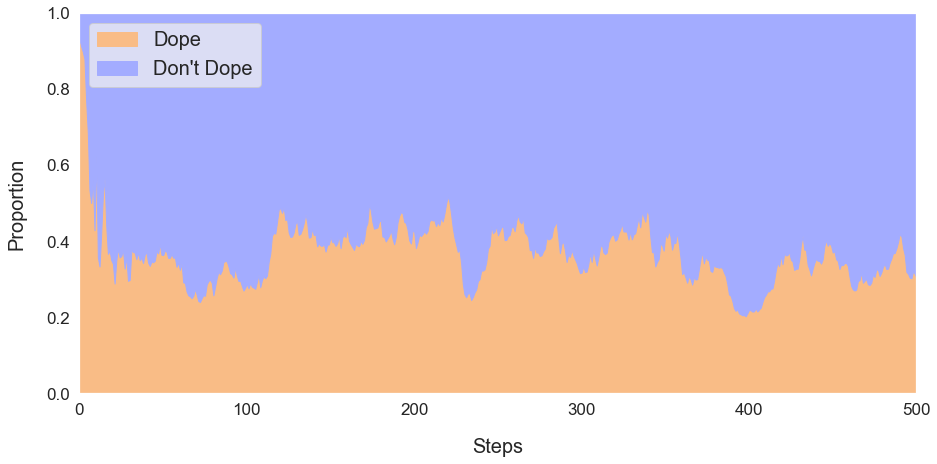

In [301]:
# plotting:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dope = []

# get percentage through each step
for i in range(len(model.proportion)):
    dope_height = model.proportion[i][0]/sum(model.proportion[i])
    dope.append(dope_height)

step = list(range(0,501))

# actual plotting
sns.set()
f, ax = plt.subplots(figsize = (15,7))
ax.set_ylim(0,1)
ax.set_xlim(0, 500)
ax.fill_between(step, dope, 0, color='#f9bc86', label = 'Dope')
ax.fill_between(step, dope, 1, color='#a3acff', label = "Don't Dope")
ax.tick_params(labelsize = 17)
ax.set_ylabel('Proportion', fontsize = 20, labelpad = 20)
ax.set_xlabel('Steps', fontsize = 20, labelpad = 20)
ax.legend(loc = 2, prop = {'size': 20})
plt.show()